# PINNS for inverse problems (heat equation)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from DNN import DeepNet

torch.autograd.set_detect_anomaly(True)
torch.manual_seed(128)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.set_default_device(device)

I'm using:  cuda


Here we define an helper function for converting data from torch tensors in the GPU to numpy arrays in the CPU.

In [2]:
def convert(x):
  return x.cpu().detach().numpy()

# Heat equation + DNN
Consider the one-dimensional heat equation:
$$
u_t(t, x) = k(t,x)u_{xx}(t, x) + s(t, x), \quad t\in[0,T], ~x\in [-1,0]
$$
with zero Dirichlet boundary conditions
$$
u_b(t, -1)=u_b(t,0)=0,
$$
and initial condition
$$
u(0, x) = u_0(x) = - \sin(\pi x)
$$
The equation parameter $k:[0,T]\times[-1,0]\mapsto \mathbb{R} $ denotes the medium conductivity and $s:[0,T]\times[-1,0]\mapsto \mathbb{R}$ is a source term. Suppose that $s(t,x)$ is given and we want to estimate $k(t,x)$ and approximate $u(t,x)$ with two different neural networks.

We will use a physics-informed neural network (PINN) to solve this inverse problem with tunable parameters $\theta$ and $\phi$:
$$
u_\theta(t,x) \approx u(t,x), \quad k_\phi(t, x) \approx k(t, x).
$$
Initialize $u_{\theta}$ as a neural network with $2$ input, $1$ output and $5$ hidden layers with $40$ neurons each. Initialize $k_{\phi}(t,x) = k_{\phi}(x)$ as a neural network with $1$ input, $1$ output and $5$ hidden layers with $40$ neurons each, both the networks use the hyperbolic tangent as activation function.

In [ ]:
sol_input = 
sol_output = 
sol_hidden_layer =

coef_input = 
coef_output = 
coef_hidden_layer =
activation_function =

approx_sol = DeepNet()
approx_coef = DeepNet()
print(approx_sol,approx_coef)

DeepNet(
  (activation): Tanh()
  (hidden): ModuleList(
    (0): Linear(in_features=2, out_features=40, bias=True)
    (1-4): 4 x Linear(in_features=40, out_features=40, bias=True)
  )
  (output): Linear(in_features=40, out_features=1, bias=False)
) DeepNet(
  (activation): Tanh()
  (hidden): ModuleList(
    (0): Linear(in_features=1, out_features=40, bias=True)
    (1-4): 4 x Linear(in_features=40, out_features=40, bias=True)
  )
  (output): Linear(in_features=40, out_features=1, bias=False)
)


# Data
We want to solve a parameter identification inverse problem, which can be formulated as follows:

Given observation measurements of the medium temperature

$$
S_{meas}=\{(t_i, x_i, u^{meas}_{i})\}_{i=1}^{N_{meas}},
$$
find $u: [0,T]\times[-1,0]\mapsto\mathbb{R}$ and $k:[-1,0]\mapsto \mathbb{R}$, such that

$$u_t(t, x) = k(t,x)u_{xx}(t, x) + s(t,x),
\\ u_b(t, -1)=u_b(t,0)=0 \quad\text{   and  } \quad u(x, 0) = u_0(x) = -\sin(\pi x).$$

Here the code to create the necessary datasets.

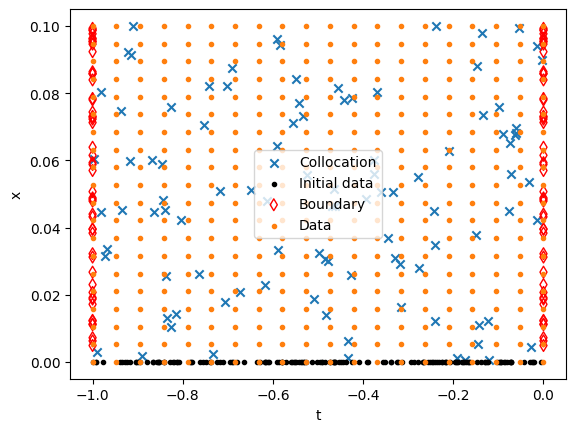

In [ ]:
x_ini, x_fin =
t_ini = 
t_fin = 0.1  

N_int = 100  # number of collocation points
N_0 = 150  # collocation of the initial data
N_b = 50  # collocation of the boundary condition
N_data = 20 # number of data points

x_int = np.random.uniform(x_ini, x_fin, (N_int, 1))
t_int = np.random.uniform(t_ini, t_fin, (N_int, 1))

x_data = torch.linspace(x_ini,x_fin,N_data)
t_data = torch.linspace(t_ini,t_fin,N_data)

data = torch.cartesian_prod(t_data,x_data)

x_0 = np.random.uniform(x_ini, x_fin, (N_0, 1))
t_0 = np.zeros((N_0, 1))


t_b = np.random.uniform(t_ini, t_fin, (N_b, 1))
x_b1 = np.zeros((N_b, 1)) + x_ini
x_b2 = np.zeros((N_b, 1)) + x_fin
# DATA plot
p1 = plt.figure(1)
plt.scatter(x_int, t_int, marker="x",label ='Collocation')
plt.scatter(x_0, t_0, marker=".", c="k",label = 'Initial data')
plt.scatter(x_b1, t_b, marker="d", facecolors="none", edgecolors="r",label = 'Boundary')
plt.scatter(x_b2, t_b, marker="d", facecolors="none", edgecolors="r")
plt.scatter(data[:,1].cpu(),data[:,0].cpu(),marker = '.',label = 'Data')
plt.xlabel("t")
plt.ylabel("x")
plt.legend()

In [5]:
# reshape of the data
x_int = torch.Tensor(x_int).to(device).requires_grad_(True).view(-1, 1)
t_int = torch.Tensor(t_int).to(device).requires_grad_(True).view(-1, 1)

x_0 = torch.Tensor(x_0).to(device).requires_grad_(False).view(-1, 1)
t_0 = torch.Tensor(t_0).to(device).requires_grad_(False).view(-1, 1)

x_data = torch.Tensor(x_data).to(device).requires_grad_(False).view(-1, 1)
t_data = torch.Tensor(t_data).to(device).requires_grad_(False).view(-1, 1)


t_b = torch.Tensor(t_b).to(device).requires_grad_(False).view(-1, 1)
x_b0 = torch.Tensor(x_b1).to(device).requires_grad_(False).view(-1, 1)
x_b1 = torch.Tensor(x_b2).to(device).requires_grad_(False).view(-1, 1)

# Initial conditions and true solution
Here we define the source term $s(t,x)$ and the initial condition $u_0(x)$. We also define the true conductivity $k(t,x)$ and the true solution $u(t,x)$.

In [ ]:
# Initial condition to solve the heat equation u0(x)=-sin(pi x)
def initial_condition(x):
    return 

# Exact solution for the heat equation ut = u_xx with the IC above
def exact_sol(x,t):
    return u

def exact_conductivity(x):
    return k

def source(x,t):
    return s

u_exact_data = exact_sol(x_data,t_data)
u_0 = initial_condition(x_0)


In [7]:
def eval_on_xt(Phi, x, t):  # needed for the evaluation of the network on two points
    return Phi(torch.cat([x, t], dim=1))

# PDE loss
We define the following residuals:

   - Interior residual given by,
   $$r_{int,\theta, \phi}(t, x):=  u_{\theta}(t, x) - k_\phi(t,x)u_{\theta, xx}(t, x) -s(t,x), \quad \forall ~t \in [0,T],~ x \in [-1,0].$$
   

        
   - Spatial boundary residual given by,
   
        $$r_{sb,\theta}(t,-1):= u_{\theta}(t,-1)- u_b(t,-1), \quad r_{sb,\theta}(t,0):= u_{\theta}(t,0)- u_b(t,0), \quad \forall t \in (0,T].$$
        
   - Temporal boundary residual given by,
   
        $$r_{tb,\theta}(x):= u_{\theta}(x,0) - u_0(x), \quad \forall x \in [-1,0].$$

and compute the corresponding loss functions:

$$
L_{int}(\theta, \phi) = \int_{[0,T]\times[-1,0]}r_{int,\theta, \phi}^2(t, x) dtdx, \quad
L_{sb}(\theta) = \int_{[0,T]}r_{sb,\theta}^2(t,-1) dt + \int_{[0,T]}r_{sb,\theta}^2(t,0)dt, \quad
L_{tb}(\theta) = \int_{[-1,0]}r_{tb,\theta}^2(x) dx
$$

The loss functions include integrals that can be approximated by suitable quadrature rule. We use quasi Monte-Carlo and accordingly define the following training sets

$$
S_{int} =\{y_n\}, \quad 1 \leq n \leq N_{int},\quad y_n = (x,t)_n \in D_T,
$$

$$
S_{sb, -1} =\{t_n, u_b(t_n,-1) \}, \quad 1 \leq n \leq N_{sb}, t_n \in [0,T],
$$

$$
S_{sb, 0} =\{t_n, u_b(t_n,0) \}, \quad 1 \leq n \leq N_{sb}, t_n \in [0,T],
$$

$$
S_{tb}=\{x_n, u_0(x_n)\}\quad  1 \leq n \leq N_{tb}, x_n \in [-1,0].
$$


So the loss functions can be approximated by
$$
L_{int}(\theta, \phi) = \frac{1}{N_{int}}\sum_{i=1}^{N_{int}}r_{int,\theta,\phi}^2(y_n), \quad
L_{sb}(\theta) = \frac{1}{N_{sb}}\sum_{i=1}^{N_{sb}}r_{sb,\theta}^2(t_n,-1) + \frac{1}{N_{sb}}\sum_{i=1}^{N_{sb}}r_{sb,\theta}^2(t_n,0), \quad
L_{tb}(\theta) = \frac{1}{N_{tb}}\sum_{i=1}^{N_{tb}}r_{tb,\theta}^2(x_n)
$$

Also the measurements data $S_{meas}$ have to taken into account. To do so, we define ad additional loss term:
$$
L_{meas} = \frac{1}{N_{meas}}\sum_{i=1}^{N_{mean}}(u_\theta(t_i, x_i) - u^{meas}_i)^2(x_n)
$$
and eventually solve the following minimization problem

$$
\theta^\ast, \phi^\ast = argmin_{\theta, \phi} \Big(L_{int}(\theta, \phi) + \lambda_u L_u(\theta)\Big)
$$

with

$$
L_u(\theta) = L_{tb}(\theta) + L_{sb}(\theta) + L_{meas}(\theta)
$$

In [ ]:
def eval_loss_pde(Phi,Psi,x,t,metric):
    x.requires_grad_(True)
    t.requires_grad_(True)
    
    u = eval_on_xt(Phi,x,t)
    k = Psi(x)
    s = source(x,t)
    u_x = torch.autograd.grad()[0]
    u_xx = torch.autograd.grad()[0]
    u_t = torch.autograd.grad()[0]

    return metric()

def eval_loss_pt(Phi,x,t,y):
    return ().pow(2).mean()

def eval_loss_data(Phi,x,t,data,metric):
    return metric()

# Training

In [ ]:
n_epochs = 6000
optimizer =  optim.Adam(list(approx_sol.parameters())+list(approx_coef.parameters()),lr = 1e-3)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer,100,0.98)

loss_values = np.empty([n_epochs+1,8]) # global,pde,t0,b0,b1,data,kb1,kb2
STEP = 100
MSE =  torch.nn.MSELoss()

for epoch in range(n_epochs+1):
  
  loss_pde = eval_loss_pde()
  
  loss_t0 = eval_loss_pt()
  loss_b0 = eval_loss_pt()
  loss_b1 = eval_loss_pt()
  loss_data = eval_loss_data()

  loss_k_b1 = approx_coef(x_b0).pow(2).mean()
  loss_k_b2 = approx_coef(x_b1).pow(2).mean()

  loss = 1.5*loss_pde +1.5*loss_t0 + loss_b0 + loss_b1 + loss_data + loss_k_b1 + loss_k_b1 + loss_k_b2

  #print(w_pde,w_t0,w_b1,w_b2,w_data)
  # zero gradients
  ...
  # loss backward
  ...
  # optimizer step
  ...
  # scheduler step
  ...

  loss_values[epoch,:] = np.stack([convert(loss),convert(loss_pde),convert(loss_t0),convert(loss_b0),convert(loss_b1),convert(loss_data),convert(loss_k_b1),convert(loss_k_b2)])

  if epoch%STEP == 0:

    print(f'Epoch {epoch} | Global loss {loss_values[epoch,0]:.4e} | pde {loss_values[epoch,1]:.4e} | t0 {loss_values[epoch,2]:.4e} | b1 {loss_values[epoch,3]:.4e} | b2 {loss_values[epoch,4]:.4e} | data {loss_values[epoch,5]:.4e} | k boundaries {loss_values[epoch,6]:.4e} {loss_values[epoch,7]:.4e} ')


Epoch 0 | Global loss 1.0577e+02 | pde 6.9916e+01 | t0 4.5808e-01 | b1 5.8645e-03 | b2 3.0534e-07 | data 1.5923e-01 | k boundaries 2.0399e-02 0.0000e+00 
Epoch 100 | Global loss 5.7360e+00 | pde 3.3178e+00 | t0 4.2818e-02 | b1 5.0636e-02 | b2 3.5304e-02 | data 3.4168e-02 | k boundaries 4.3160e-02 4.8862e-01 
Epoch 200 | Global loss 1.2784e+00 | pde 7.0069e-01 | t0 6.5294e-02 | b1 3.9004e-02 | b2 6.1413e-02 | data 1.9559e-02 | k boundaries 6.1275e-04 8.2051e-03 
Epoch 300 | Global loss 3.4463e-01 | pde 5.0836e-02 | t0 1.0035e-01 | b1 4.3428e-02 | b2 4.7922e-02 | data 2.6471e-02 | k boundaries 2.3278e-06 2.6058e-05 
Epoch 400 | Global loss 3.0951e-01 | pde 3.0576e-02 | t0 9.9320e-02 | b1 4.5264e-02 | b2 4.3613e-02 | data 2.5765e-02 | k boundaries 1.2508e-05 1.9093e-06 
Epoch 500 | Global loss 2.8746e-01 | pde 2.4028e-02 | t0 9.4839e-02 | b1 4.2748e-02 | b2 4.1896e-02 | data 2.4510e-02 | k boundaries 1.7673e-06 1.3733e-10 
Epoch 600 | Global loss 2.6402e-01 | pde 1.7790e-02 | t0 8.9744e-0

# Visualize loss function during training

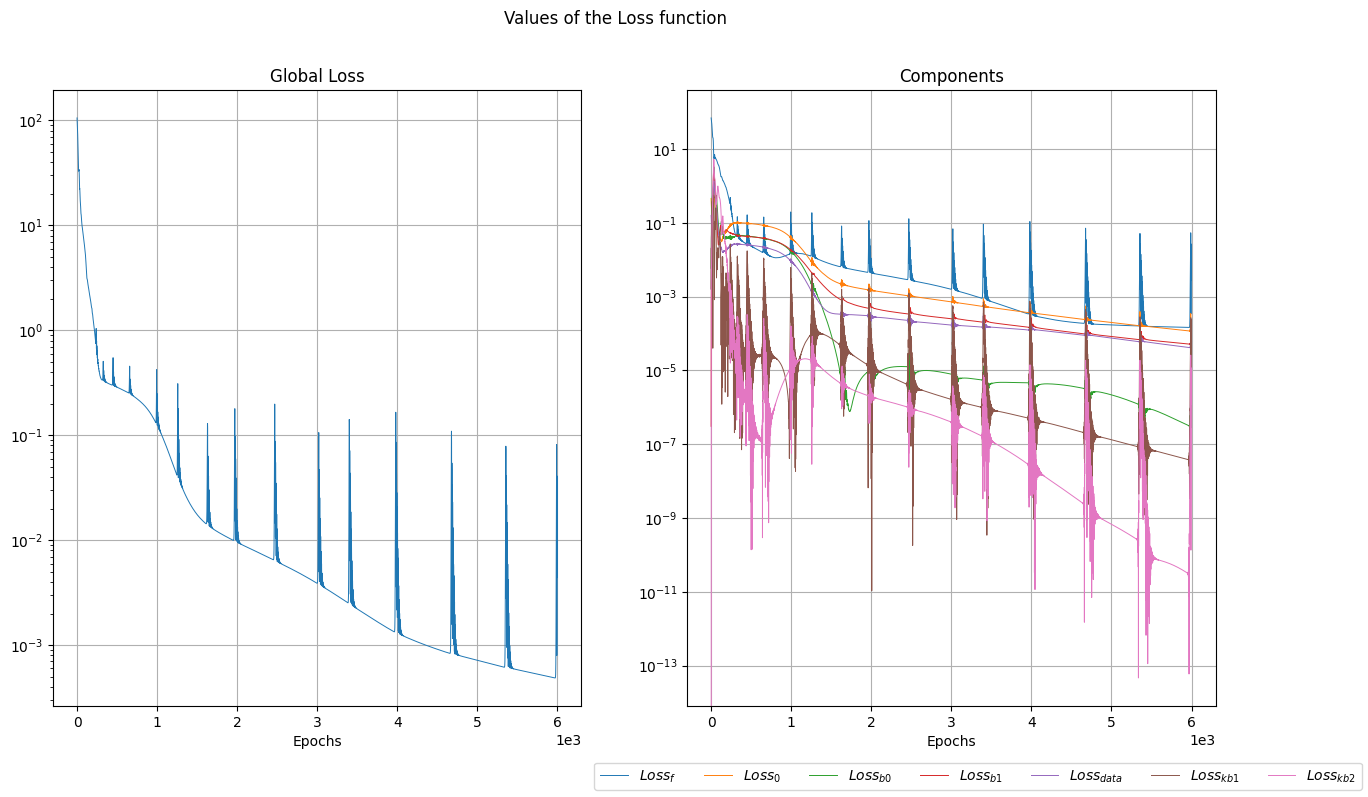

In [10]:
p2 = plt.figure(2, (15, 8))
# global,pde,t0,b0,b1,data,kb1,kb2
e = range(n_epochs + 1)
ax1, ax2 = p2.subplots(1, 2)
ax1.semilogy(e, loss_values[:, 0], linewidth=0.7)
ax1.set_title("Global Loss")
ax1.set_xlabel("Epochs")
ax1.ticklabel_format(style="sci", axis="x", scilimits=(0, 0))
ax1.grid()

# plt.ylabel('Loss values')
ax2.semilogy(e, loss_values[:, 1], linewidth=0.7, label="$Loss_f$")
ax2.semilogy(e, loss_values[:, 2], linewidth=0.7, label="$Loss_0$")
ax2.semilogy(e, loss_values[:, 3], linewidth=0.7, label="$Loss_{b0}$")
ax2.semilogy(e, loss_values[:, 4], linewidth=0.7, label="$Loss_{b1}$")
ax2.semilogy(e, loss_values[:, 5], linewidth=0.7, label="$Loss_{data}$")
ax2.semilogy(e, loss_values[:, 6], linewidth=0.7, label="$Loss_{kb1}$")
ax2.semilogy(e, loss_values[:, 7], linewidth=0.7, label="$Loss_{kb2}$")
ax2.set_xlabel("Epochs")
ax2.set_title("Components")
ax2.ticklabel_format(style="sci", axis="x", scilimits=(0, 0))
ax2.grid()
p2.legend(loc="lower right", ncol=7)

plt.suptitle("Values of the Loss function")
plt.show()

# Visualize the true and predicted solutions

In [11]:
N_int_tst = 300
N_0_tst = 1000  # same sample for initial data and initial derivate
N_b_tst = 1000

x_test = torch.linspace(x_ini, x_fin, N_int_tst)
t_test = torch.linspace(t_ini, t_fin, N_int_tst)

x_grid, t_grid = torch.meshgrid(x_test, t_test, indexing="ij")
XT = torch.stack([x_grid.ravel(), t_grid.ravel()], axis=-1)

x_0_tst = torch.linspace(x_ini, x_fin, N_0_tst).reshape(1, -1).t()
t_0_tst = torch.zeros_like(x_0_tst)
t_0t_tst = t_0_tst.requires_grad_(True)  # needed for the evaluation of the derivate

t_b_tst = torch.linspace(t_ini, t_fin, N_b_tst).reshape(1, -1).t()
x_b1_tst = torch.zeros_like(t_b_tst)
x_b2_tst = torch.zeros_like(t_b_tst) + x_fin

In [12]:
with torch.inference_mode():
    # Get the model's prediction
    U_theta = convert(eval_on_xt(approx_sol, XT[:, 0:1], XT[:, 1:2]))
    # Reshape U_theta to have the same structure as your grid
    U_theta = U_theta.reshape(x_grid.shape)
    u_ex_tst = convert(exact_sol(x_grid, t_grid))
    x_grid = convert(x_grid)
    t_grid = convert(t_grid)


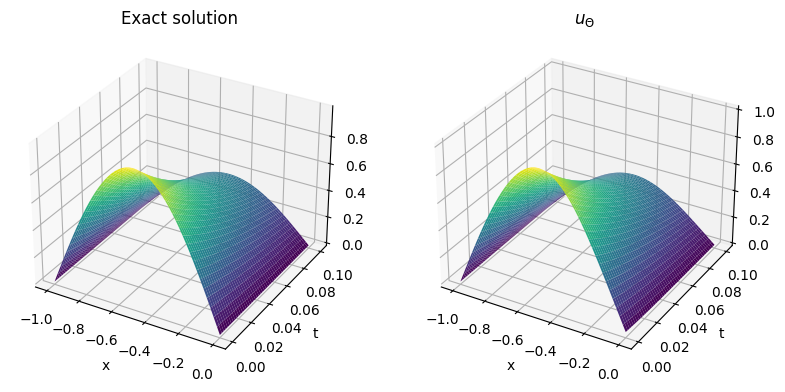

In [13]:
# Plot the surface
p3 = plt.figure(3, figsize=plt.figaspect(0.5))

ax = p3.add_subplot(1, 2, 1, projection="3d")
ax.plot_surface(x_grid, t_grid, u_ex_tst, cmap="viridis")
ax.set_title("Exact solution")
ax.set_xlabel("x")
ax.set_ylabel("t")
ax = p3.add_subplot(1, 2, 2, projection="3d")
ax.plot_surface(x_grid, t_grid, U_theta, cmap="viridis")
ax.set_title(r"$u_{\Theta}$")
ax.set_xlabel("x")
ax.set_ylabel("t")
plt.show()

In [ ]:
plt.scatter(convert(x_int),convert(exact_conductivity(x_int)))
plt.scatter(convert(x_int),convert(approx_coef(x_int)))
plt.grid()

TypeError: sort() received an invalid combination of arguments - got (torch.return_types.sort, dim=int), but expected one of:
 * (Tensor input, *, bool stable, int dim, bool descending, tuple of Tensors out)
 * (Tensor input, int dim, bool descending, *, tuple of Tensors out)
 * (Tensor input, *, bool stable, name dim, bool descending, tuple of Tensors out)
 * (Tensor input, name dim, bool descending, *, tuple of Tensors out)
